### Imports

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

### Setup the constants and global vars that we need
- Population of 10 chromosomes
- Each chromosome will be a 10 bit string
- We will use roulette wheel selection
- With all bit set our scaling factor for conversion will be 102.3

In [2]:
populationSize = 10
bitlength = 10
population = [];
roulette = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,
           4,4,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9,]
scale = 102.3;
roulettesize = len(roulette)

### This is what the problem looks like
A value of **~3.8** on the x axis will yield the highest value on the y axis of **~0.56**

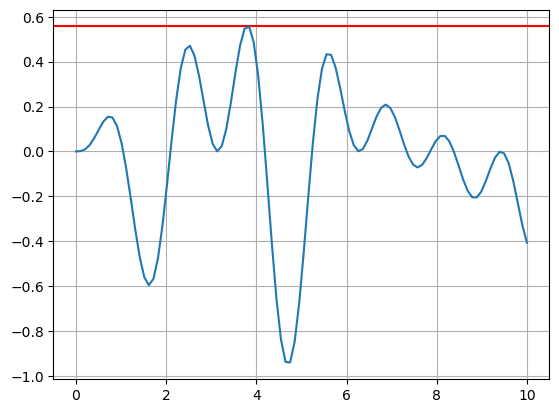

In [3]:
def f(x):
    return(math.sin(x) * math.sin(0.4*x) * math.sin(3.0*x))

# Generate our x axis range
x = np.linspace(0, 10, 100)
# Calculate y axis value for each x value
y = [f(i) for i in x]
plt.grid()
plt.axhline(y = max(y), color = 'r', linestyle = '-')
plt.plot(x, y)
plt.show()

### Functions to setup the population, evaluate chromosomes, and sort based on fitness function.

In [4]:
# Define functions to make population and evaluate chromosomes using a fitness func
def makePopulation(size, length):
    for p in range(size):
        bits = ""
        for l in range(length):
            bits = bits + str(random.randint(0, 1))
        population.append([bits, 0])

def fitnessFunc(bits):
    x = int(bits, 2)/scale;
    return(math.sin(x) * math.sin(0.4*x) * math.sin(3.0*x))

def evaluate(population, func):
    for x in range(populationSize):
        population[x][1] = func(population[x][0])

def byFitness(elem):
    return elem[1]

def sort(population):
    population.sort(key=byFitness, reverse=True)

### Use the roulette wheel values to select two parents
<img src="images/roulettewheel.png" width="350" align="left" />


In [5]:
def selectparents(population):
    # Pick two index values from roulette wheel
    p1 = random.randint(0, roulettesize-1)
    p2 = random.randint(0, roulettesize-1)
    # Make sure they are not the same parent
    while(roulette[p1] == roulette[p2]):
        p1 = random.randint(0, roulettesize-1)
        p2 = random.randint(0, roulettesize-1)

    # Return the two populationindex values
    return [roulette[p1], roulette[p2]]

### Carry out single point crossover to combine genes
<img src="images/singlepoint_crossover.png" width="500" align="left" />

In [6]:
def crossover(parent1, parent2):
    # Pick a random location in the bitstring
    locus = random.randint(0, bitlength-1)
    # Slice bitstring up to locus
    left = parent1[0][0:locus]
    # Slice bitstring from locus to end
    right = parent2[0][locus:]
    # Combine genes
    offspring = left + right;
    # Return the new offspring as tuple
    return [offspring, 0]

### Carry out some mutation based on a mutation rate
The mutation rate will control how many bits are flipped


<img src="images/mutation.png" width="500" align="left" />

In [7]:
def mutate(offspring, rate):
    bits = list(offspring[0])
    # How many bits do we need to flip?
    numflips = int(bitlength * rate)
    # Sample numflips index values from the bitstring -> no duplicates
    flips = random.sample(range(bitlength), numflips)
    # Loop through each index pos and flip the bit value
    for x in range(numflips):
        if (bits[flips[x]] == '1'):
            bits[flips[x]] = '0'
        else:
            bits[flips[x]] = '1'
    # Convert the bit list to a string and return a tuple
    return ["".join(bits), offspring[1]]


### Code an evolve function 
This function will be called at each generation
- Select parents
- Do crossover
- Mutate
- Evaluate (update fitness of each chromosome)
- Rank the population

In [8]:
# This function will be called at each generation
def evolve(population, generations):
    for gen in range(generations):
        # Pick the parents
        parents = selectparents(population) #[0,1]
        # Create the offspring
        offspring = crossover(population[parents[0]], population[parents[1]])
        # Mutate the offspring
        offspring = mutate(offspring, 0.4)
        # Integrate offspring into population
        # Replace the weakest member
        population[populationSize-1] = offspring
        # Evaluate (calc fitness) each population member
        evaluate(population, fitnessFunc)
        # Sort the population by fitness (reverse order descending)
        sort(population)

### Setup the population for evolution

In [9]:
# Prepare the population for evolution
# Might be a good idea to clear any pre-existing population
population = []
# Create the random population to begin with
makePopulation(populationSize,bitlength)
# Evaluate (calc fitness) each population member
evaluate(population, fitnessFunc)
# Sort the population by fitness (reverse order descending)
sort(population)
# Let's look at the initial population
print(population)

[['0001010100', 0.14813170689667882], ['0000101100', 0.06859382102874305], ['0100110110', 0.034078409390264686], ['0000010110', 0.011024948075306129], ['1000010101', -0.05923429597987224], ['0011010011', -0.06174543162964341], ['1100000101', -0.0712067690857552], ['1110011110', -0.15112178605189447], ['0110111010', -0.3516809583205116], ['0010110001', -0.5593668680650329]]


### Evolve for N generations
<img src="images/evolve.png" width="400" align="left" />

In [10]:
# Evolve the population for 1000 generations
evolve(population, 1000)

In [11]:
# Let's see what the population looks like 
print(population)

[['0110000101', 0.5617897970394297], ['0110000100', 0.5614576584197855], ['0110000110', 0.5613955401723697], ['0110000011', 0.5604107216888747], ['0110001001', 0.5557550685531354], ['0110001011', 0.5482006727223256], ['0110001100', 0.543267600156351], ['0101111101', 0.5399001172044304], ['0110001111', 0.5238066776194739], ['0010111011', -0.462954405652966]]


### Plot the result

In [12]:
# Take the first chromosome and convert to a number
# If the algorithm has converged it should be close to 3.8
result = int(population[0][0],2)/102.3
print(result)

3.8025415444770285


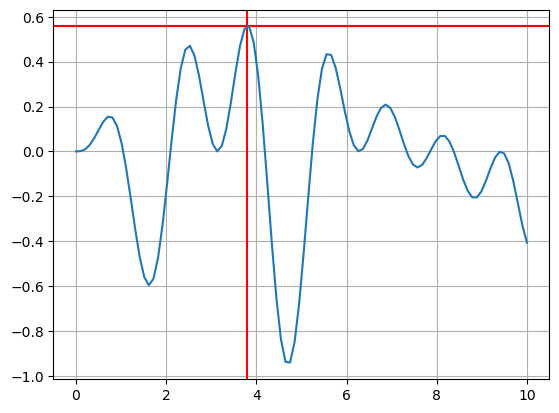

In [13]:
# Plot the result
plt.grid()
plt.axhline(y = max(y), color = 'r', linestyle = '-')
plt.axvline(x = result, color = 'r', linestyle = '-')
plt.plot(x, y)
plt.show()